Author: Thibeau Wouters

# Master thesis: holographic RG flows

##### Import packages:

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import pandas as pd
import scipy as scipy

In [5]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Computer Modern Roman',
     'text.latex.preamble':r'\usepackage{amsmath}',
     'font.family':'serif',
     'font.sans-serif':'Computer Modern Sans Serif',
     'font.cursive':'Zapf Chancery',
     'font.monospace':'Computer Modern Typewriter',
     "figure.figsize": (7, 4),
    "axes.titlesize" : 12,
    "axes.labelsize" : 17,
    "lines.linewidth": 1.75,
    "lines.markersize" : 5,
     "legend.fontsize": 19,
    "xtick.labelsize" : 16,
    "ytick.labelsize" : 16})

Color options can be found here: https://xkcd.com/color/rgb/

In [9]:
headerNames = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4", "x5", "y5", "x6", "y6", "x7", "y7"]
zval = 1000000;
zval2 = 1000;
COLORS = ["xkcd:red", "xkcd:emerald", "xkcd:vibrant blue", "xkcd:golden", "xkcd:neon purple", "xkcd:light brown", "xkcd:red wine"]
gray = (0.89803921568, 0.89803921568, 0.89803921568)
starmarker = "x" # D for diamonds
realFieldsNameX = r'$x_\alpha$'
realFieldsNameY = r'$y_\alpha$'

In [7]:
def fromVectorToPairs(vector):
    return [(vector[0], vector[1]), (vector[2], vector[3]), (vector[4], vector[5]), (vector[6], vector[7]), (vector[8], vector[9]), (vector[10], vector[11]), (vector[12], vector[13])]

# MODEL 1) SO(8)

### Load critical points

In [8]:
# Load FP 2
SO8_FP2_df = pd.read_csv("flowData_SO8_FP2.csv", header = None)
SO8_FP2 = SO8_FP2_df[0].values
SO8_FP2_paired = fromVectorToPairs(SO8_FP2)

SO8_FP2_c1_df = pd.read_csv("flowData_SO8_FP2_copy1.csv", header = None)
SO8_FP2_c1 = SO8_FP2_c1_df[0].values
SO8_FP2_paired_c1 = fromVectorToPairs(SO8_FP2_c1)

# Load FP 3
SO8_FP3_df = pd.read_csv("flowData_SO8_FP3.csv", header = None)
SO8_FP3 = SO8_FP3_df[0].values
SO8_FP3_paired = fromVectorToPairs(SO8_FP3)

# Load FP 4 (SO(3))
SO8_FP4_df = pd.read_csv("flowData_SO8_FP4.csv", header = None)
SO8_FP4 = SO8_FP4_df[0].values
SO8_FP4_paired = fromVectorToPairs(SO8_FP4)

# Load FP 5 (S12 point)
SO8_FP5_df = pd.read_csv("flowData_SO8_FP5.csv", header = None)
SO8_FP5 = SO8_FP5_df[0].values
SO8_FP5_paired = fromVectorToPairs(SO8_FP5)

### 1 - Direct flow 2 - 1 AND direct flow 3 - 1 combined

In [11]:
# Load the flow data
flowData1 = pd.read_csv("flowData_SO8_2_to_1.csv", header = None).T
flowData1.columns = headerNames

# Load second flow data
flowData2 = pd.read_csv("flowData_SO8_3_to_1_direct.csv", header = None).T
flowData2.columns = headerNames

rmax = 10
npoints = len(flowData1["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

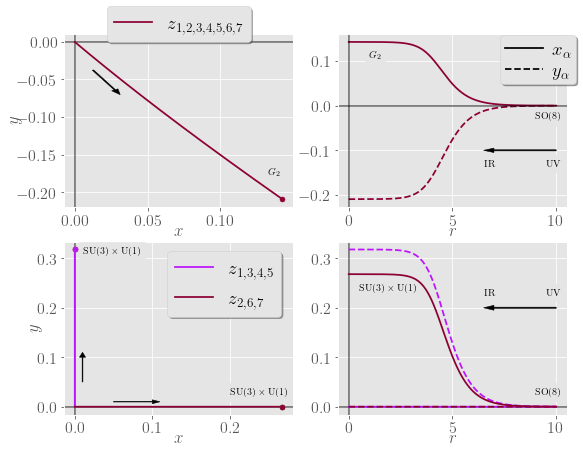

In [53]:
fig = plt.figure(figsize = (9, 7))

### ax1: complex plane
plt.subplot(2, 2, 1)

# Plot fixed points
(xC, yC) = SO8_FP2_paired[6]
plt.scatter(xC, yC, color = COLORS[6], zorder = zval)

# Plot solutions:

plt.plot(flowData1["x7"].values, flowData1["y7"].values, color = COLORS[6],zorder= zval2, label = r'$z_{1,2,3,4,5,6,7}$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(0.1325, -0.175, r'$G_2$', backgroundcolor = gray)
    
# Make fancy, save and show
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.215), ncol=2, fancybox=True, shadow=True)
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -5)

# draw an arrow
r = 0.015
dx = r*1
dy = -r*1.75
plt.arrow(0.0125,-0.0375, dx, dy, color = "black", width = 0.001, head_width = 0.005)

### ax2
plt.subplot(2, 2, 2)

plt.plot(rvalues, flowData1["x7"].values, '-',   color = COLORS[6]) 
plt.plot(rvalues, flowData1["y7"].values, '--', color = COLORS[6]) 

# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Add text:
plt.text(9, -0.03, r'$\text{SO}(8)$', backgroundcolor = gray)
plt.text(1, 0.11, r'$G_2$', backgroundcolor = gray)

# draw an arrow
plt.arrow(10,-0.1, -3, 0, color = "black", width = 0.0025, head_width = 0.01, head_length = 0.5)
dx = 0.5
plt.text(10 - dx, -0.135, r'UV', backgroundcolor = gray)
plt.text(7 - dx, -0.135, r'IR', backgroundcolor = gray)


# Make fancy, save and show

plt.xlabel(r'$r$', labelpad = -5)
# plt.ylabel(r'$\phi_a$')
plt.legend(loc='upper center', bbox_to_anchor=(0.875, 1.05), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

## ==============================================================================================================
## ==============================================================================================================
## ==============================================================================================================
## ==============================================================================================================

## ax3
plt.subplot(2, 2, 3)

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # Third fixed point
    (xC, yC) = SO8_FP3_paired[i]
    plt.scatter(xC, yC, color = color, zorder = zval)
    
# Plot solutions:
 
plt.plot(flowData2["x5"].values, flowData2["y5"].values, color = COLORS[4], zorder= zval2, label = r'$z_{1,3,4,5}$')        
plt.plot(flowData2["x7"].values, flowData2["y7"].values, color = COLORS[6],zorder= zval2, label = r'$z_{2,6,7}$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(0.2, 0.025, r'$\text{SU}(3) \times \text{U}(1)$', backgroundcolor = gray)
plt.text(0.01, 0.31, r'$\text{SU}(3) \times \text{U}(1)$', backgroundcolor = gray)
# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -5)
plt.legend(loc='upper center', bbox_to_anchor=(0.7, 1), ncol=1, fancybox=True, shadow=True)

# draw an arrow
plt.arrow(0.05, 0.01, 0.05, 0, color = "black", width = 0.001, head_width = 0.008, head_length = 0.01)
plt.arrow(0.01, 0.05, 0, 0.05, color = "black", width = 0.001, head_width = 0.008, head_length = 0.01)

## ax 4
plt.subplot(2, 2, 4)

plt.plot(rvalues, flowData2["x5"].values, '-',   zorder = zval, color = COLORS[4]) 
plt.plot(rvalues, flowData2["y5"].values, '--', zorder = zval, color = COLORS[4]) 
plt.plot(rvalues, flowData2["x7"].values, '-',  zorder = zval, color = COLORS[6]) 
plt.plot(rvalues, flowData2["y7"].values, '--', zorder = zval, color = COLORS[6]) 

# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Add text:

plt.text(9, 0.025, r'$\text{SO}(8)$', backgroundcolor = gray)
plt.text(0.5, 0.235, r'$\text{SU}(3) \times \text{U}(1)$', backgroundcolor = gray)

# draw an arrow
plt.arrow(10, 0.2, -3, 0, color = "black", width = 0.0025, head_width = 0.01, head_length = 0.5)
dx = 0.5
plt.text(10 - dx, 0.225, r'UV', backgroundcolor = gray)
plt.text(7 - dx, 0.225, r'IR', backgroundcolor = gray)


# Make fancy, save and show

plt.xlabel(r'$r$', labelpad = -5)

plt.savefig('flowPlot_SO8_2_to_1_AND_3_to_1.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_2_to_1_AND_3_to_1.pdf', bbox_inches = 'tight')
plt.show()

### 2 - Triangular flow 3 - 2 - 1

In [54]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_3_to_1.csv", header = None).T
flowData.columns = headerNames
rmax = 20

Real fields as a function of r

In [55]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

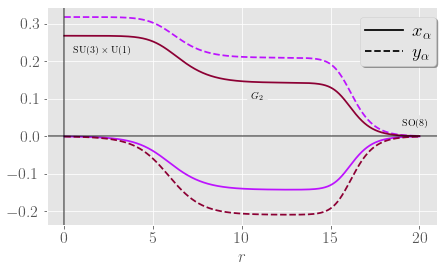

In [56]:
plt.figure()

# plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
# plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
# plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
# plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
# plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
# plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
# plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 
# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Add text:

plt.text(19, 0.025, r'$\text{SO}(8)$', backgroundcolor = gray)
plt.text(10.5, 0.1, r'$G_2$', backgroundcolor = gray)
plt.text(0.5, 0.22, r'$\text{SU}(3) \times \text{U}(1)$', backgroundcolor = gray)

# Make fancy, save and show

plt.xlabel(r'$r$')
# plt.ylabel(r'$\phi_a$')
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_RF_SO8_3_to_1.png', bbox_inches = 'tight')
plt.savefig('flowPlot_RF_SO8_3_to_1.pdf', bbox_inches = 'tight')
plt.show()

Complex plane

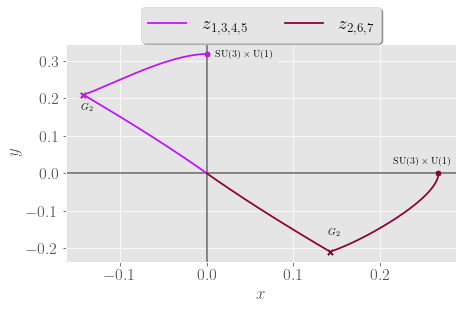

In [57]:
plt.figure()

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # Third fixed point
    (xC, yC) = SO8_FP3_paired[i]
    plt.scatter(xC, yC, color = color, zorder = zval)
    
    # Second fixed point
    (xC, yC) = SO8_FP2_paired[i]
    plt.scatter(xC, yC, color = color, zorder = zval, marker = starmarker)

# Plot solutions:

# plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0])    
# plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1])    
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2])    
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3])    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder= zval2, label = r'$z_{1,3,4,5}$')        
# plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5])    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval2, label = r'$z_{2,6,7}$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(0.215, 0.025, r'$\text{SU}(3) \times \text{U}(1)$', backgroundcolor = gray)
plt.text(0.01, 0.31, r'$\text{SU}(3) \times \text{U}(1)$', backgroundcolor = gray)
plt.text(0.14, -0.162, r'$G_2$', backgroundcolor = gray)
plt.text(-0.145, 0.171, r'$G_2$', backgroundcolor = gray)
    
# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.215), ncol=2, fancybox=True, shadow=True)
plt.savefig('flowPlot_SO8_3_to_1.png', bbox_inches = 'tight', dpi = 1200)
plt.savefig('flowPlot_SO8_3_to_1.pdf', bbox_inches = 'tight')
plt.show()

### 2.5 - Flow SO(8) to SO(3), direct

In [67]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_4_to_1_direct.csv", header = None).T
flowData.columns = headerNames
rmax = 9

Real fields as a function of r

In [68]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

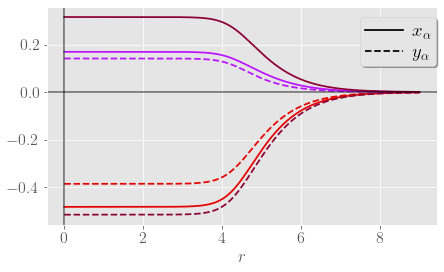

In [69]:
plt.figure()

plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0]) 
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0]) 
# plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
# plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
# plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
# plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
# plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)
    

# Make fancy, save and show
plt.xlabel(r'$r$')
# plt.ylabel(r'$\phi_a$')
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_RF_SO8_4_to_1_direct.png', bbox_inches = 'tight')
plt.savefig('flowPlot_RF_SO8_4_to_1_direct.pdf', bbox_inches = 'tight')
plt.show()

Complex plane

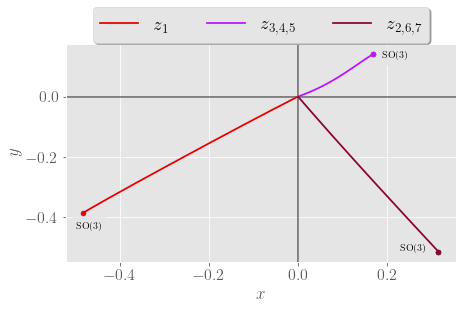

In [72]:
plt.figure()

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP4_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)

# Plot solutions:
zval3=5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder= zval3,label = r'$z_1$')    
# plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1])    
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2])    
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3])    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_{3,4,5}$')        
# plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5])    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder= zval3,label = r'$z_{2,6,7}$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(0.19, 0.1275, r'$\text{SO}(3)$', backgroundcolor = gray) #purple
plt.text(-0.5, -0.44, r'$\text{SO}(3)$', backgroundcolor = gray)#red
plt.text(0.23, -0.515, r'$\text{SO}(3)$', backgroundcolor = gray)#brown

# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.215), ncol=3, fancybox=True, shadow=True)
plt.savefig('flowPlot_SO8_4_to_1_direct.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_4_to_1_direct.pdf', bbox_inches = 'tight')
plt.show()

### 2.75 - SO(8) to SO(3) broken

In [76]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_4_to_1_broken.csv", header = None).T
flowData.columns = headerNames
rmax = 9

Real fields as a function of r

In [77]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

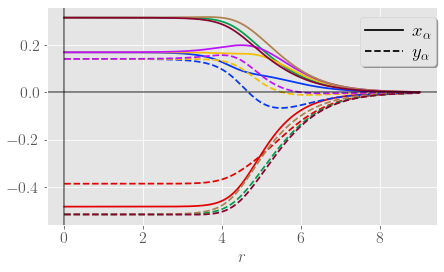

In [78]:
plt.figure()

plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0]) 
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 


# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)
    

# Make fancy, save and show
plt.xlabel(r'$r$')
# plt.ylabel(r'$\phi_a$')
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_RF_SO8_4_to_1_broken.png', bbox_inches = 'tight')
plt.savefig('flowPlot_RF_SO8_4_to_1_broken.pdf', bbox_inches = 'tight')
plt.show()

Complex plane

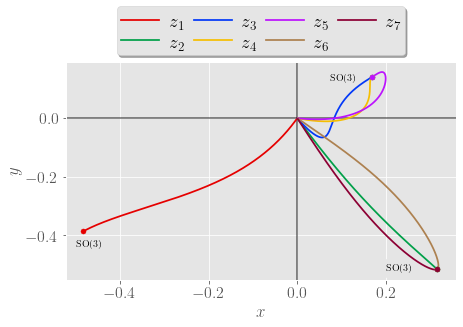

In [84]:
plt.figure()

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP4_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)

# Plot solutions:
zval3=5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')    
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')    
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_3$')    
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_4$')    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_6$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(0.075, 0.1275, r'$\text{SO}(3)$', backgroundcolor = gray) #purple
plt.text(-0.5, -0.44, r'$\text{SO}(3)$', backgroundcolor = gray)#red
plt.text(0.2, -0.52, r'$\text{SO}(3)$', backgroundcolor = gray)#brown
    
# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_SO8_4_to_1_broken.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_4_to_1_broken.pdf', bbox_inches = 'tight')
plt.show()

### 3 - Triangular flow 4 - 2 - 1

In [58]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_4_to_2.csv", header = None).T
flowData.columns = headerNames
rmax = 15

Real fields as a function of r

In [59]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

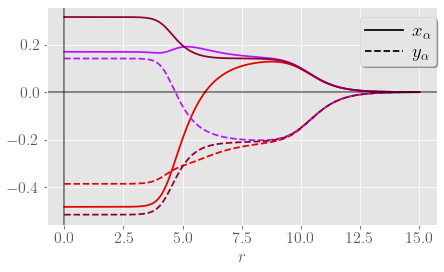

In [60]:
plt.figure()

plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0]) 
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0]) 
# plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
# plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
# plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
# plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
# plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)
    

# Make fancy, save and show
plt.xlabel(r'$r$')
# plt.ylabel(r'$\phi_a$')
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_RF_SO8_4_to_2.png', bbox_inches = 'tight')
plt.savefig('flowPlot_RF_SO8_4_to_2.pdf', bbox_inches = 'tight')
plt.show()

Complex plane

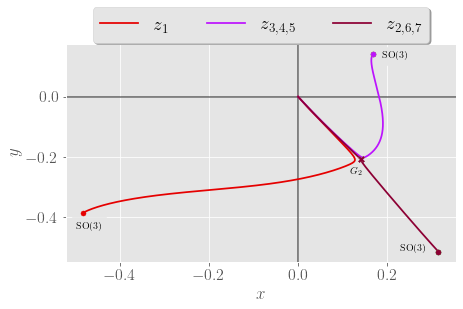

In [61]:
plt.figure()

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP4_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    # Halfway UV
    (xC, yC) = SO8_FP2_paired_c1[i]
    plt.scatter(xC, yC, color = color, zorder = 10, marker = starmarker)

# Plot solutions:
zval3=5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder= zval3,label = r'$z_1$')    
# plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1])    
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2])    
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3])    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_{3,4,5}$')        
# plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5])    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder= zval3,label = r'$z_{2,6,7}$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(0.19, 0.1275, r'$\text{SO}(3)$', backgroundcolor = gray) #purple
plt.text(-0.5, -0.44, r'$\text{SO}(3)$', backgroundcolor = gray)#red
plt.text(0.23, -0.515, r'$\text{SO}(3)$', backgroundcolor = gray)#brown
plt.text(0.118, -0.255, r'$G_2$', backgroundcolor = gray)
    

# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.215), ncol=3, fancybox=True, shadow=True)
plt.savefig('flowPlot_SO8_4_to_2.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_4_to_2.pdf', bbox_inches = 'tight')
plt.show()

### 4 - Triangular flow 4 - 2 - 1 -- first family

In [62]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_4_to_2_family1.csv", header = None).T
flowData.columns = headerNames
rmax = 15

Real fields as a function of r

In [63]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

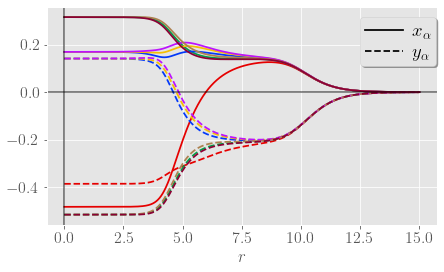

In [65]:
plt.figure()

plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0]) 
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 


# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)
    

# Make fancy, save and show
plt.xlabel(r'$r$')
# plt.ylabel(r'$\phi_a$')
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_RF_SO8_4_to_2_family1.png', bbox_inches = 'tight')
plt.savefig('flowPlot_RF_SO8_4_to_2_family1.pdf', bbox_inches = 'tight')
plt.show()

Complex plane

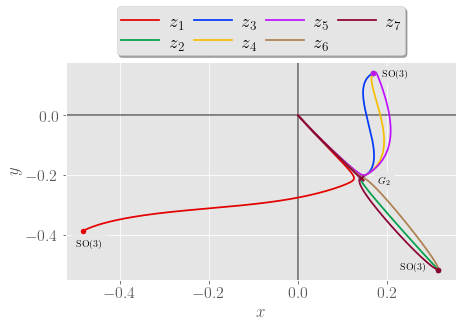

In [66]:
plt.figure()

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP4_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    # Halfway UV
    (xC, yC) = SO8_FP2_paired_c1[i]
    plt.scatter(xC, yC, color = color, zorder = 10, marker = starmarker)

# Plot solutions:
zval3=5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')    
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')    
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_3$')    
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_4$')    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_6$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(0.19, 0.1275, r'$\text{SO}(3)$', backgroundcolor = gray) #purple
plt.text(-0.5, -0.44, r'$\text{SO}(3)$', backgroundcolor = gray)#red
plt.text(0.23, -0.515, r'$\text{SO}(3)$', backgroundcolor = gray)#brown
plt.text(0.18, -0.225, r'$G_2$', backgroundcolor = gray)
    
# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_SO8_4_to_2_family1.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_4_to_2_family1.pdf', bbox_inches = 'tight')
plt.show()

### 5 - Flow 5 - 1

Note: as in the Mathematica notebook, the fifth fixed point is $\textbf{not}$ the fifth in order of scalar potential value, but this is the "newest" fixed point, namely the S12. 

In [20]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_5_to_1.csv", header = None).T
flowData.columns = headerNames
rmax = 9

Real fields as a function of r

In [21]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

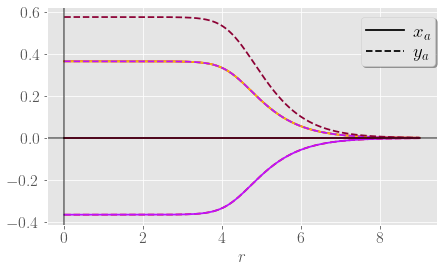

In [22]:
plt.figure()

plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0]) 
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 


# Plot nothing, to get legend
plt.plot(0, 0, '-', color = 'black', label = realFieldsNameX)
plt.plot(0, 0, '--', color = 'black', label = realFieldsNameY)

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)
    

# Make fancy, save and show
plt.xlabel(r'$r$')
# plt.ylabel(r'$\phi_a$')
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_RF_SO8_5_to_1.png', bbox_inches = 'tight')
plt.savefig('flowPlot_RF_SO8_5_to_1.pdf', bbox_inches = 'tight')
plt.show()

Complex plane

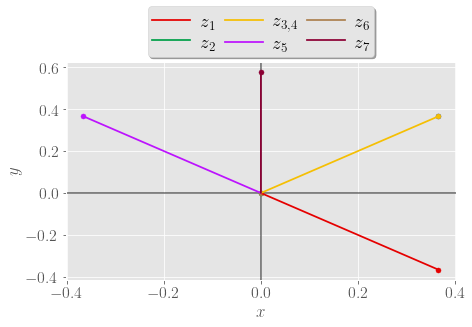

In [23]:
plt.figure()

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP5_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
#     # UV
#     (xC, yC) = SO8_FP2_paired_c1[i]
#     plt.scatter(xC, yC, color = color, zorder = 10, marker = "*")

# Plot solutions:

plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_{3,4}$')
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_6$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)
    
# Make fancy, save and show
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_SO8_5_to_1.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_5_to_1.pdf', bbox_inches = 'tight')
plt.show()

### 6 - Triangular flow 5 - 2 - 1 -- broken

In [24]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_5_to_2_triang.csv", header = None).T
flowData.columns = headerNames
rmax = 17

Real fields as a function of r

In [25]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

Combine all:

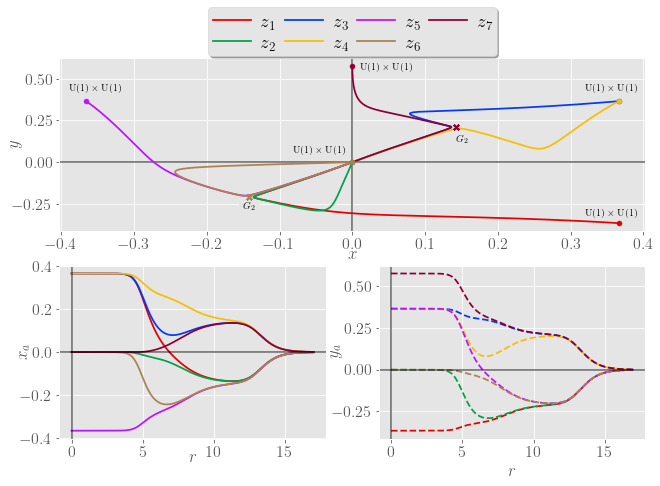

In [26]:
fig = plt.figure(figsize = (10.5, 7))

### ax1: complex plane
plt.subplot(2, 1, 1)

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP5_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    # UV
    plt.scatter(0.1425648393202649, 0.2092694770429543, color = COLORS[6], zorder = 10, marker = starmarker)
    plt.scatter(-0.1425648393202649, -0.2092694770429543, color = COLORS[5], zorder = 10, marker = starmarker)

# Plot solutions:
zval3 = 5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')    
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')    
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_3$')    
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_4$')    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_6$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

# Text
plt.text(-0.39, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #purple
plt.text(-0.082, 0.05, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #origin-like
plt.text(0.01, 0.55, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #top
plt.text(0.32, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #blue yellow
plt.text(0.32, -0.325, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #red

plt.text(-0.15, -0.275, r'$G_2$', backgroundcolor = gray)
plt.text(0.1425, 0.125, r'$G_2$', backgroundcolor = gray)

### ax2, ax3: real fields
plt.subplot(2, 2, 3)

## ax2

# Real fields
plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy
plt.xlabel(r'$r$', labelpad = -10)
plt.ylabel(realFieldsNameX, labelpad = -10)

## ax 3
plt.subplot(2, 2, 4)

# Imaginary fields
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)


# Make fancy, save and show
plt.xlabel(r'$r$')
plt.ylabel(realFieldsNameY, labelpad = -10)

plt.savefig('flowPlot_SO8_5_to_2_triang_complete.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_5_to_2_triang_complete.pdf', bbox_inches = 'tight')
plt.show()

### 7 - Triangular flow 5 - 2 - 1 -- broken, second one

In [27]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_5_to_2_triang_v2.csv", header = None).T
flowData.columns = headerNames
rmax = 18

Real fields as a function of r

In [28]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

Combine all:

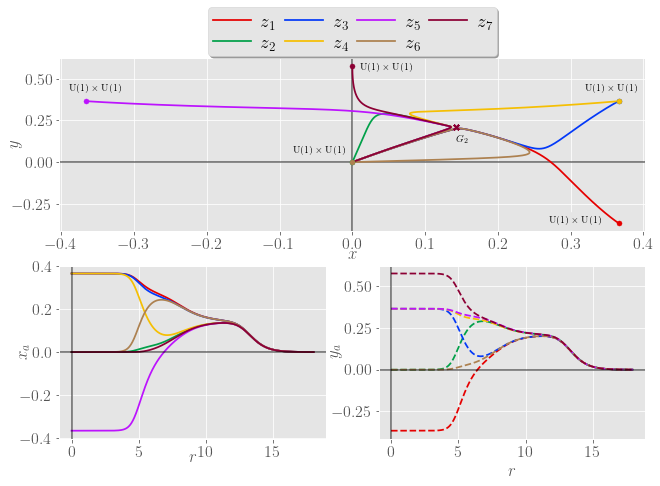

In [29]:
fig = plt.figure(figsize = (10.5, 7))

### ax1: complex plane
plt.subplot(2, 1, 1)

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP5_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    # UV
    plt.scatter(0.1425648393202649, 0.2092694770429543, color = COLORS[6], zorder = 10, marker = starmarker)
#     plt.scatter(-0.1425648393202649, -0.2092694770429543, color = COLORS[5], zorder = 10, marker = "*")

# Plot solutions:
zval3 = 5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')    
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')    
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_3$')    
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_4$')    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_6$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(-0.39, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #purple
plt.text(-0.082, 0.05, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #origin-like
plt.text(0.01, 0.55, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #top
plt.text(0.32, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #blue yellow
plt.text(0.27, -0.37, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #red

plt.text(0.1425, 0.125, r'$G_2$', backgroundcolor = gray)

# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -10)
### IF we want to limit the plot:
# plt.xlim(0, 0.4)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

### ax2, ax3: real fields
plt.subplot(2, 2, 3)

## ax2

# Real fields
plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy
plt.xlabel(r'$r$', labelpad = -10)
plt.ylabel(realFieldsNameX, labelpad = -10)

## ax 3
plt.subplot(2, 2, 4)

# Imaginary fields
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy, save and show
plt.xlabel(r'$r$')
plt.ylabel(realFieldsNameY, labelpad = -10)

plt.savefig('flowPlot_SO8_5_to_2_triang_complete_v2.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_5_to_2_triang_complete_v2.pdf', bbox_inches = 'tight')
plt.show()

### 8 - Flow 5 - 1 -- strange, broken flow

In [30]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_5_to_1_strange.csv", header = None).T
flowData.columns = headerNames
rmax = 12

Real fields as a function of r

In [31]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

Combine all:

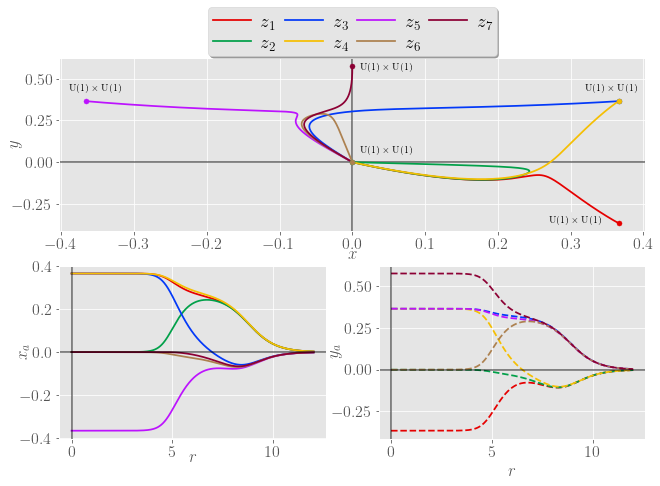

In [32]:
fig = plt.figure(figsize = (10.5, 7))

### ax1: complex plane
plt.subplot(2, 1, 1)

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP5_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)

# Plot solutions:
zval3 = 5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')    
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')    
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_3$')    
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_4$')    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_6$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(-0.39, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #purple
plt.text(0.01, 0.05, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #origin-like
plt.text(0.01, 0.55, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #top
plt.text(0.32, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #blue yellow
plt.text(0.27, -0.37, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #red


# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -10)
### IF we want to limit the plot:
# plt.xlim(0, 0.4)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

### ax2, ax3: real fields
plt.subplot(2, 2, 3)

## ax2

# Real fields
plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy
plt.xlabel(r'$r$', labelpad = -10)
plt.ylabel(realFieldsNameX, labelpad = -10)

## ax 3
plt.subplot(2, 2, 4)

# Imaginary fields
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy, save and show
plt.xlabel(r'$r$')
plt.ylabel(realFieldsNameY, labelpad = -10)

plt.savefig('flowPlot_SO8_5_to_2_strange.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_5_to_2_strange.pdf', bbox_inches = 'tight')
plt.show()

### 9 - Flow: 5 - 2 -- direct flow, no breaking

In [33]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_5_to_2_no_breaking.csv", header = None).T
flowData.columns = headerNames
rmax = 19

Real fields as a function of r

In [34]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

Combine all:

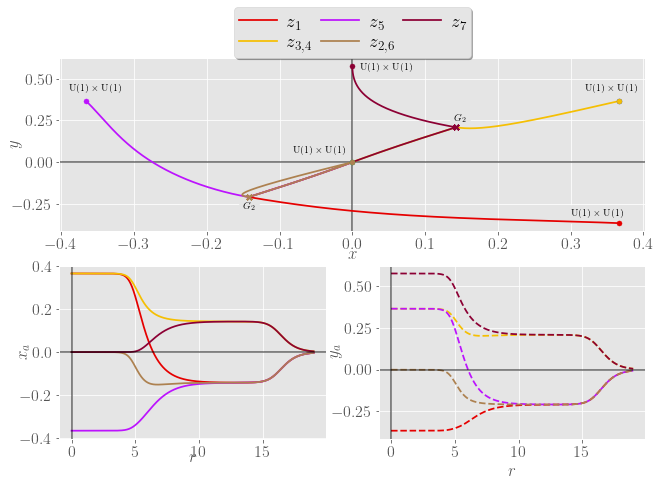

In [35]:
fig = plt.figure(figsize = (10.5, 7))

### ax1: complex plane
plt.subplot(2, 1, 1)

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP5_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    # UV
    plt.scatter(0.1425648393202649, 0.2092694770429543, color = COLORS[6], zorder = 10, marker = starmarker)
    plt.scatter(-0.1425648393202649, -0.2092694770429543, color = COLORS[5], zorder = 10, marker = starmarker)
    

# Plot solutions:
zval3 = 5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')    
# plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_3$')
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_{3,4}$')    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_{2,6}$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(-0.39, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #purple
plt.text(0-0.082, 0.05, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #origin-like
plt.text(0.01, 0.55, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #top
plt.text(0.32, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #blue yellow
plt.text(0.3, -0.325, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #red

plt.text(-0.15, -0.275, r'$G_2$', backgroundcolor = gray)
plt.text(0.14, 0.25, r'$G_2$', backgroundcolor = gray)


# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -10)
### IF we want to limit the plot:
# plt.xlim(0, 0.4)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

### ax2, ax3: real fields
plt.subplot(2, 2, 3)

## ax2

# Real fields
plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
# plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
# plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy
plt.xlabel(r'$r$', labelpad = -10)
plt.ylabel(realFieldsNameX, labelpad = -10)

## ax 3
plt.subplot(2, 2, 4)

# Imaginary fields
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
# plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy, save and show
plt.xlabel(r'$r$')
plt.ylabel(realFieldsNameY, labelpad = -10)

plt.savefig('flowPlot_SO8_5_to_2_no_breaking.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_5_to_2_no_breaking.pdf', bbox_inches = 'tight')
plt.show()

### 10 - Conjectured flow

In [36]:
# Load the flow data
flowData = pd.read_csv("flowData_SO8_conjectured.csv", header = None).T
flowData.columns = headerNames
rmax = 7

Real fields as a function of r

In [37]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

Combine all:

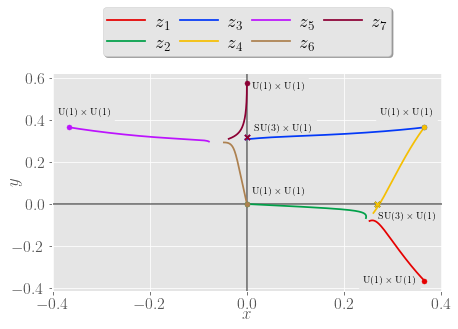

In [38]:
fig = plt.figure()

UV = [(0.267949192431, 0), (0.267949192431, 0), (0, 0.317837245196), (0.267949192431, 0), (0, 0.317837245196), (0, 0.317837245196), (0, 0.317837245196)]

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = SO8_FP5_paired[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    color = COLORS[i]
    # UV
    (xC, yC) = UV[i]
    plt.scatter(xC, yC, color = color, zorder = 10, marker = starmarker)

# Plot solutions:
zval3 = 5
plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')    
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_3$')
plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_{4}$')    
plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_{6}$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_7$')    

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
plt.text(-0.39, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #purple
plt.text(0.01, 0.05, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #origin-like
plt.text(0.01, 0.55, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #top
plt.text(0.275, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #blue yellow
plt.text(0.24, -0.375, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #red

plt.text(0.015, 0.35, r'$\text{SU}(3)\times \text{U}(1)$', backgroundcolor = gray)
plt.text(0.27, -0.07, r'$\text{SU}(3)\times \text{U}(1)$', backgroundcolor = gray)

# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -10)
### IF we want to limit the plot:
# plt.xlim(0, 0.4)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

plt.savefig('flowPlot_SO8_conjectured.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO8_conjectured.pdf', bbox_inches = 'tight')
plt.show()

# MODEL 2) ISO(7)

### Load critical points

In [39]:
# Load FP 1
ISO7_FP1_df = pd.read_csv("flowData_ISO7_FP1.csv", header = None)
ISO7_FP1 = ISO7_FP1_df[0].values
ISO7_FP1_paired = fromVectorToPairs(ISO7_FP1)

# Load FP 5
ISO7_FP5_df = pd.read_csv("flowData_ISO7_FP5.csv", header = None)
ISO7_FP5 = ISO7_FP5_df[0].values
ISO7_FP5_paired = fromVectorToPairs(ISO7_FP5)

### 1 - First-ever broken flow from 5 to 1

In [40]:
# Load the flow data
flowData = pd.read_csv("flowData_ISO7_5_to_1_first_broken.csv", header = None).T
flowData.columns = headerNames
rmax = 15

Real fields as a function of r

In [41]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

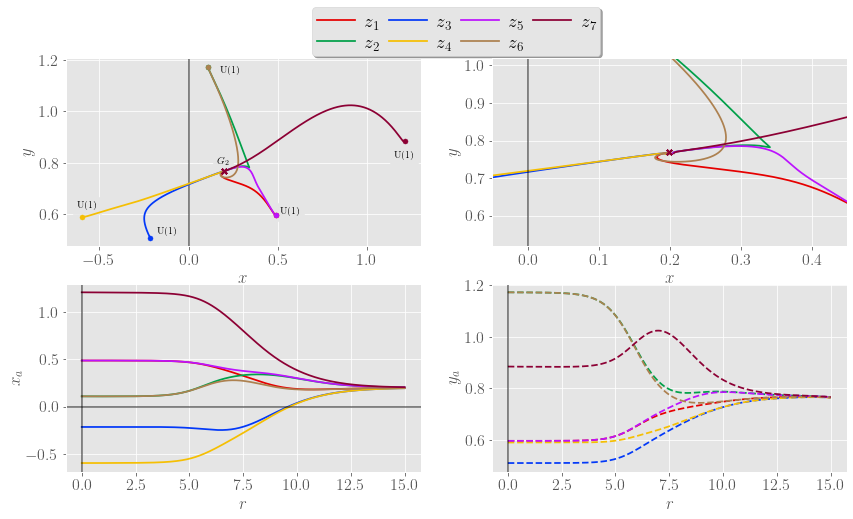

In [42]:
fig, axs = plt.subplots(2, 2, figsize = (14, 7.6))
[[ax1, ax2], [ax3, ax4]] = axs

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = ISO7_FP5_paired[i]
    ax1.scatter(xC, yC, color = color, zorder = zval)
    ax2.scatter(xC, yC, color = color, zorder = zval)
    
    # UV
    (xC, yC) = ISO7_FP1_paired[i]
    xCg2, yCg2 = xC, yC
    ax1.scatter(xC, yC, color = COLORS[6], zorder = zval, marker = starmarker)
    ax2.scatter(xC, yC, color = COLORS[6], zorder = zval, marker = starmarker)

# Plot solutions:
ax1.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval2, label = r'$z_1$')    
ax1.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval2, label = r'$z_2$')
ax1.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval2, label = r'$z_3$')    
ax1.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval2, label = r'$z_4$')    
ax1.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval2, label = r'$z_{5}$')        
ax1.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval2, label = r'$z_{6}$')    
ax1.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval2, label = r'$z_7$')    

# Plot solutions, second panel:
ax2.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], label = r'$z_1$')    
ax2.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], label = r'$z_2$')    
ax2.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], label = r'$z_3$')    
ax2.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], label = r'$z_4$')    
ax2.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], label = r'$z_{5}$')        
ax2.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], label = r'$z_{6}$')    
ax2.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], label = r'$z_7$')    

# Plot axes
ax1.axvline(0, color = "black", alpha = 0.5)
ax2.axvline(0, color = "black", alpha = 0.5)

# Text
ax1.text(0.51, 0.6, r'$\text{U}(1)$', backgroundcolor = gray) #purple
ax1.text(0.175, 1.15, r'$\text{U}(1)$', backgroundcolor = gray) #green
ax1.text(-0.625, 0.625, r'$\text{U}(1)$', backgroundcolor = gray) #yellow
ax1.text(1.15, 0.82, r'$\text{U}(1)$', backgroundcolor = gray) #dark red
ax1.text(-0.175, 0.525, r'$\text{U}(1)$', backgroundcolor = gray) #blue

ax1.text(0.16, 0.8, r'$G_2$', backgroundcolor = gray)
    
# Make fancy, save and show
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
eps =0.25
ax2.set_xlim(xCg2 - eps, xCg2 + eps)
ax2.set_ylim(yCg2 - eps, yCg2 + eps)

ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.325), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

### 3 & 4
# Real fields
ax3.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
ax3.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
ax3.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
ax3.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
ax3.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
ax3.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
ax3.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Imaginary fields
ax4.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
ax4.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
ax4.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
ax4.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
ax4.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
ax4.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
ax4.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Make fancy, save and show
ax3.set_xlabel(r'$r$')
ax4.set_xlabel(r'$r$')

ax3.set_ylabel(realFieldsNameX)
ax4.set_ylabel(realFieldsNameY)
# ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct_v2.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct_v2.pdf', bbox_inches = 'tight')
# plt.show()

# Plot axes
# plt.axhline(0, color = "black", alpha = 0.5)
ax3.axvline(0, color = "black", alpha = 0.5)
ax3.axhline(0, color = "black", alpha = 0.5)
ax4.axvline(0, color = "black", alpha = 0.5)
    
# Make fancy, save and show
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_ISO7_5_to_1_broken_complete.png', bbox_inches = 'tight')
plt.savefig('flowPlot_ISO7_5_to_1_broken_complete.pdf', bbox_inches = 'tight')
plt.show()

### 2 - First-ever direct flow from 5 to 1

In [43]:
# Load the flow data
flowData = pd.read_csv("flowData_ISO7_5_to_1_first_direct.csv", header = None).T
flowData.columns = headerNames
rmax = 15

Real fields as a function of r

In [44]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

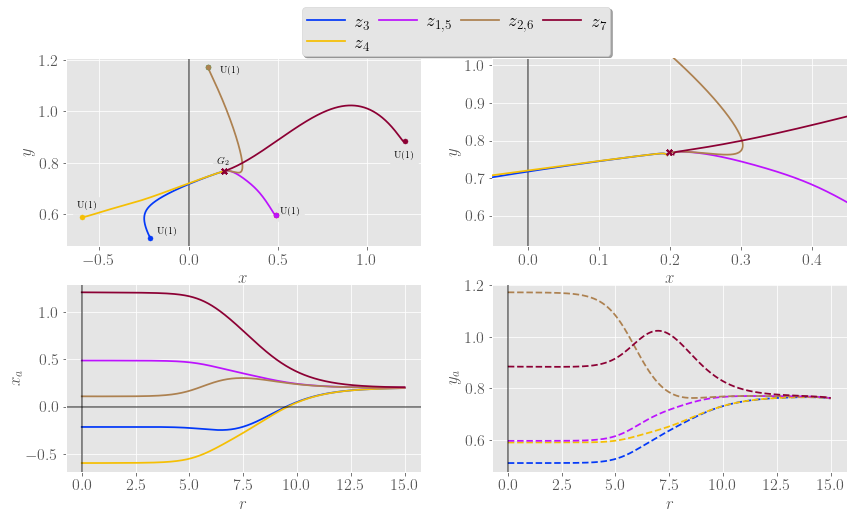

In [45]:
fig, axs = plt.subplots(2, 2, figsize = (14, 7.6))
[[ax1, ax2], [ax3, ax4]] = axs

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = ISO7_FP5_paired[i]
    ax1.scatter(xC, yC, color = color, zorder = zval)
    ax2.scatter(xC, yC, color = color, zorder = zval)
    
    # UV
    (xC, yC) = ISO7_FP1_paired[i]
    xCg2, yCg2 = xC, yC
    ax1.scatter(xC, yC, color = COLORS[6], zorder = zval, marker = starmarker)
    ax2.scatter(xC, yC, color = COLORS[6], zorder = zval, marker = starmarker)

# Plot solutions:
# ax1.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# ax1.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')
ax1.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval2, label = r'$z_3$')    
ax1.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval2, label = r'$z_4$')    
ax1.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval2, label = r'$z_{1,5}$')        
ax1.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval2, label = r'$z_{2,6}$')    
ax1.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval2, label = r'$z_7$')    

# Plot solutions, second panel:
# ax2.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# ax2.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
ax2.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval2, label = r'$z_3$')    
ax2.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval2, label = r'$z_4$')    
ax2.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval2, label = r'$z_{1, 5}$')        
ax2.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval2, label = r'$z_{2,6}$')    
ax2.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval2, label = r'$z_7$')    

# Plot axes
ax1.axvline(0, color = "black", alpha = 0.5)
ax2.axvline(0, color = "black", alpha = 0.5)

# Text
ax1.text(0.51, 0.6, r'$\text{U}(1)$', backgroundcolor = gray) #purple
ax1.text(0.175, 1.15, r'$\text{U}(1)$', backgroundcolor = gray) #green
ax1.text(-0.625, 0.625, r'$\text{U}(1)$', backgroundcolor = gray) #yellow
ax1.text(1.15, 0.82, r'$\text{U}(1)$', backgroundcolor = gray) #dark red
ax1.text(-0.175, 0.525, r'$\text{U}(1)$', backgroundcolor = gray) #blue

ax1.text(0.16, 0.8, r'$G_2$', backgroundcolor = gray)
    
# Make fancy, save and show
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
eps =0.25
ax2.set_xlim(xCg2 - eps, xCg2 + eps)
ax2.set_ylim(yCg2 - eps, yCg2 + eps)

ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.325), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

### 3 & 4
# Real fields
# ax1.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
# ax1.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
ax3.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
ax3.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
ax3.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
ax3.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
ax3.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Imaginary fields
# ax2.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
# ax2.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
ax4.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
ax4.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
ax4.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
ax4.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
ax4.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Make fancy, save and show
ax3.set_xlabel(r'$r$')
ax4.set_xlabel(r'$r$')

ax3.set_ylabel(realFieldsNameX)
ax4.set_ylabel(realFieldsNameY)
# ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct_v2.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct_v2.pdf', bbox_inches = 'tight')
# plt.show()

# Plot axes
# plt.axhline(0, color = "black", alpha = 0.5)
ax3.axvline(0, color = "black", alpha = 0.5)
ax3.axhline(0, color = "black", alpha = 0.5)
ax4.axvline(0, color = "black", alpha = 0.5)
    
# Make fancy, save and show
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
plt.savefig('flowPlot_ISO7_5_to_1_direct_complete.png', bbox_inches = 'tight')
plt.savefig('flowPlot_ISO7_5_to_1_direct_complete.pdf', bbox_inches = 'tight')
plt.show()

# MODEL 3) SO(1,1)

### Load critical points

In [87]:
### For GS1 flow:
# Load FP 1
# GS2_FP1_df = pd.read_csv("flowData_GS_2_start.csv", header = None)
# GS2_FP1 = GS2_FP1_df[0].values
# GS2_FP1_paired = fromVectorToPairs(GS2_FP1)

# # Load FP 2
# GS2_FP2_df = pd.read_csv("flowData_GS_2_goal.csv", header = None)
# GS2_FP2 = GS2_FP2_df[0].values
# GS2_FP2_paired = fromVectorToPairs(GS2_FP2)


### For GS2 flow:
# Load FP 1
GS2_FP1_df = pd.read_csv("flowData_SO11_GS_2_start.csv", header = None)
GS2_FP1 = GS2_FP1_df[0].values
# GS2_FP1_paired = fromVectorToPairs(GS2_FP1)

GS2_FP1_paired = [()]

# Load FP 2
GS2_FP2_df = pd.read_csv("flowData_SO11_GS_2_goal.csv", header = None)
GS2_FP2 = GS2_FP2_df[0].values
# GS2_FP2_paired = fromVectorToPairs(GS2_FP2)

### 1 - Original flow by Guarino & Sterckx

In [117]:
# Load the flow data
flowData = pd.read_csv("flowData_SO11_GS_1.csv", header = None).T
flowData.columns = headerNames
rmax = 19

Real fields as a function of r

In [118]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

Get fixed points values:

In [119]:
GS_1_FP1 = [(flowData["x1"][0], flowData["y1"][0]), (flowData["x2"][0], flowData["y2"][0]), (flowData["x3"][0], flowData["y3"][0]), (flowData["x4"][0], flowData["y4"][0]), (flowData["x5"][0], flowData["y5"][0]), (flowData["x6"][0], flowData["y6"][0]), (flowData["x7"][0], flowData["y7"][0])]
GS_1_FP2 = [(0, np.sqrt(5)/3), (0, np.sqrt(5)/3), (0, np.sqrt(5)/3), (np.sqrt(1/6), np.sqrt(5/6)), (np.sqrt(1/6), np.sqrt(5/6)), (np.sqrt(1/6), np.sqrt(5/6)), (np.sqrt(1/6), np.sqrt(5/6))]

Plot all together:

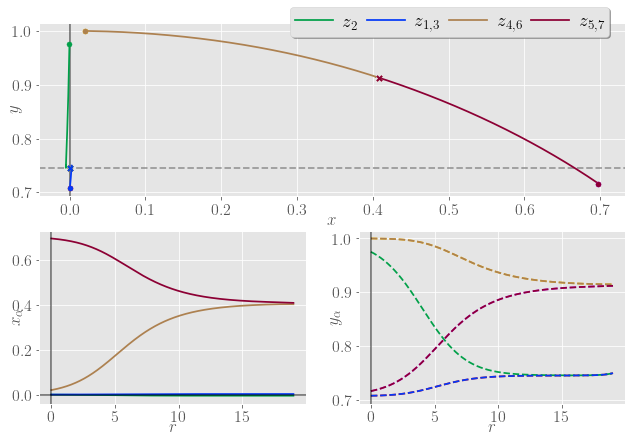

In [121]:
fig = plt.figure(figsize = (10.5, 7))

### ax1: complex plane
plt.subplot(2, 1, 1)

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = GS_1_FP1[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    # UV
    (xC, yC) = GS_1_FP2[i]
    plt.scatter(xC, yC, color = color, zorder = 10, marker = starmarker)
    

# Plot solutions:
zval3 = 5
# plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_{1,3}$')
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_{3,4}$')    
# plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_{4,6}$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_{5,7}$')    

# Plot axes
plt.axhline(np.sqrt(5)/3, ls = '--', color = "gray", alpha = 0.75)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
# plt.text(-0.39, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #purple



# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -10)
### IF we want to limit the plot:
# plt.xlim(0, 0.4)
plt.legend(loc='upper center', bbox_to_anchor=(0.7, 1.15), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

### ax2, ax3: real fields
plt.subplot(2, 2, 3)

## ax2

# Real fields
# plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy
plt.xlabel(r'$r$', labelpad = -5)
plt.ylabel(realFieldsNameX, labelpad = -10)

## ax 3
plt.subplot(2, 2, 4)

# Imaginary fields
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot axes
# plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy, save and show
plt.xlabel(r'$r$', labelpad = -5)
plt.ylabel(realFieldsNameY, labelpad = -10)

plt.savefig('flowPlot_SO11_GS_1.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO11_GS_1.pdf', bbox_inches = 'tight')
plt.show()

### 2 - Adapted flow by Guarino & Sterckx (well, by me, using the G&S expansion)

In [122]:
# Load the flow data
flowData = pd.read_csv("flowData_SO11_GS_2.csv", header = None).T
flowData.columns = headerNames
rmax = 20

Real fields as a function of r

In [123]:
npoints = len(flowData["x1"].values)
rvalues = np.linspace(0, rmax, npoints)

Get fixed points values:

In [125]:
GS_2_FP1 = [(flowData["x1"][0], flowData["y1"][0]), (flowData["x2"][0], flowData["y2"][0]), (flowData["x3"][0], flowData["y3"][0]), (flowData["x4"][0], flowData["y4"][0]), (flowData["x5"][0], flowData["y5"][0]), (flowData["x6"][0], flowData["y6"][0]), (flowData["x7"][0], flowData["y7"][0])]
GS_2_FP2 = [(flowData["x1"][2000], flowData["y1"][2000]), (flowData["x2"][2000], flowData["y2"][2000]), (flowData["x3"][2000], flowData["y3"][2000]), (np.sqrt(1/6), np.sqrt(5/6)), (np.sqrt(1/6), np.sqrt(5/6)), (np.sqrt(1/6), np.sqrt(5/6)), (np.sqrt(1/6), np.sqrt(5/6))]

Plot all together:

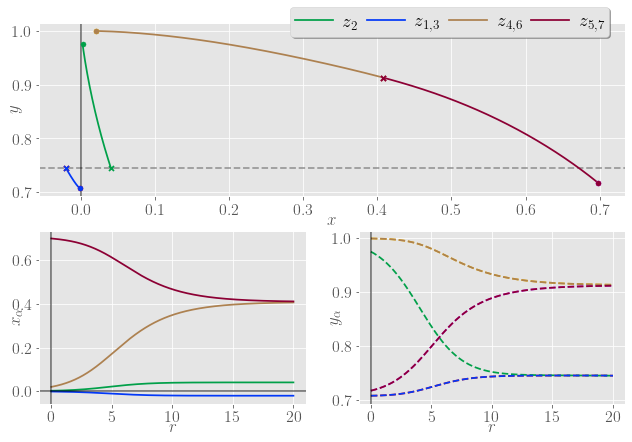

In [126]:
fig = plt.figure(figsize = (10.5, 7))

### ax1: complex plane
plt.subplot(2, 1, 1)

# Plot fixed points
for i in range(0, 7):
    color = COLORS[i]
    # IR
    (xC, yC) = GS_2_FP1[i]
    plt.scatter(xC, yC, color = color, zorder = 10)
    
    # UV
    (xC, yC) = GS_2_FP2[i]
    plt.scatter(xC, yC, color = color, zorder = 10, marker = starmarker)
    

# Plot solutions:
zval3 = 5
# plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0],zorder= zval3, label = r'$z_1$')
plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1],zorder= zval3, label = r'$z_2$')
plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2],zorder= zval3, label = r'$z_{1,3}$')
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3],zorder= zval3, label = r'$z_{3,4}$')    
# plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4],zorder= zval3, label = r'$z_5$')        
plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5],zorder= zval3, label = r'$z_{4,6}$')    
plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6],zorder= zval3, label = r'$z_{5,7}$')    

# Plot axes
plt.axhline(np.sqrt(5)/3, ls = '--', color = "gray", alpha = 0.75)
plt.axvline(0, color = "black", alpha = 0.5)

# Text
# plt.text(-0.39, 0.425, r'$\text{U}(1)\times \text{U}(1)$', backgroundcolor = gray) #purple



# Make fancy, save and show
plt.xlabel(r'$x$', labelpad = -5)
plt.ylabel(r'$y$', labelpad = -10)
### IF we want to limit the plot:
# plt.xlim(0, 0.4)
plt.legend(loc='upper center', bbox_to_anchor=(0.7, 1.15), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)

### ax2, ax3: real fields
plt.subplot(2, 2, 3)

## ax2

# Real fields
# plt.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
plt.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
plt.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# plt.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# plt.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
plt.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
plt.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# Plot axes
plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy
plt.xlabel(r'$r$', labelpad = -5)
plt.ylabel(realFieldsNameX, labelpad = -10)

## ax 3
plt.subplot(2, 2, 4)

# Imaginary fields
plt.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
plt.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
plt.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
plt.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
plt.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
plt.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
plt.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# Plot axes
# plt.axhline(0, color = "black", alpha = 0.5)
plt.axvline(0, color = "black", alpha = 0.5)

# Make fancy, save and show
plt.xlabel(r'$r$', labelpad = -5)
plt.ylabel(realFieldsNameY, labelpad = -10)

plt.savefig('flowPlot_SO11_GS_2.png', bbox_inches = 'tight')
plt.savefig('flowPlot_SO11_GS_2.pdf', bbox_inches = 'tight')
plt.show()

# =======================================================

# ======================== Archive ========================

# =======================================================

In [46]:
# fig, axs = plt.subplots(1, 2, figsize = (12, 4))
# ax1, ax2 = axs

# # Real fields
# ax1.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
# ax1.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
# ax1.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# ax1.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# ax1.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
# ax1.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
# ax1.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# # Imaginary fields
# ax2.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
# ax2.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# ax2.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
# ax2.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
# ax2.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
# ax2.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
# ax2.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# # Plot absolutely nothing, to get legend
# # ax1.plot(0, 0, '-', color = 'black', label = r'$x_a$')
# # ax2.plot(0, 0, '--', color = 'black', label = r'$y_a$')

# # Plot axes
# ax1.axhline(0, color = "black", alpha = 0.5)
# ax1.axvline(0, color = "black", alpha = 0.5)

# ax2.axhline(0, color = "black", alpha = 0.5)
# ax2.axvline(0, color = "black", alpha = 0.5)

# # Make fancy, save and show
# ax1.set_xlabel(r'$r$')
# ax2.set_xlabel(r'$r$')

# ax1.set_ylabel(r'$x_a$')
# ax2.set_ylabel(r'$y_a$')

# # Save and show
# plt.savefig('flowPlot_RF_SO8_5_to_2_triang.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_RF_SO8_5_to_2_triang.pdf', bbox_inches = 'tight')
# plt.show()

Complex plane

In [47]:
# plt.figure()

# # Plot fixed points
# for i in range(0, 7):
#     color = COLORS[i]
#     # IR
#     (xC, yC) = SO8_FP5_paired[i]
#     plt.scatter(xC, yC, color = color, zorder = 10)
    
#     # UV
    
#     plt.scatter(0.1425648393202649, 0.2092694770429543, color = COLORS[6], zorder = 10, marker = "*")
#     plt.scatter(-0.1425648393202649, -0.2092694770429543, color = COLORS[5], zorder = 10, marker = "*")

# # Plot solutions:

# plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_4$')    
# plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_5$')        
# plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_6$')    
# plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# # Plot axes
# plt.axhline(0, color = "black", alpha = 0.5)
# plt.axvline(0, color = "black", alpha = 0.5)
    
# # Make fancy, save and show
# plt.xlabel(r'$x$')
# plt.ylabel(r'$y$')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_SO8_5_to_2_triang.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_SO8_5_to_2_triang.pdf', bbox_inches = 'tight')
# plt.show()

In [48]:
# fig, axs = plt.subplots(1, 2, figsize = (12, 4))
# ax1, ax2 = axs

# # Real fields
# # ax1.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
# # ax1.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
# ax1.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# ax1.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# ax1.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
# ax1.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
# ax1.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# # Imaginary fields
# # ax2.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
# # ax2.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# ax2.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
# ax2.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
# ax2.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
# ax2.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
# ax2.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# # Plot absolutely nothing, to get legend
# # ax1.plot(0, 0, '-', color = 'black', label = r'$x_a$')
# # ax2.plot(0, 0, '--', color = 'black', label = r'$y_a$')

# # Plot axes
# ax1.axhline(0, color = "black", alpha = 0.5)
# ax1.axvline(0, color = "black", alpha = 0.5)

# # ax2.axhline(0, color = "black", alpha = 0.5)
# ax2.axvline(0, color = "black", alpha = 0.5)

# # Make fancy, save and show
# ax1.set_xlabel(r'$r$')
# ax2.set_xlabel(r'$r$')

# ax1.set_ylabel(r'$x_a$')
# ax2.set_ylabel(r'$y_a$')

# # ax1.setlegend(loc='upper center', bbox_to_anchor=(0.875, 1.1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_RF_ISO7_5_to_1_first_direct.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_RF_ISO7_5_to_1_first_direct.pdf', bbox_inches = 'tight')
# plt.show()

Complex plane

In [49]:
# fig, axs = plt.subplots(1, 2, figsize = (12, 4))
# ax1, ax2 = axs

# # Plot fixed points
# for i in range(0, 7):
#     color = COLORS[i]
#     # IR
#     (xC, yC) = ISO7_FP5_paired[i]
#     ax1.scatter(xC, yC, color = color, zorder = zval)
#     ax2.scatter(xC, yC, color = color, zorder = zval)
    
#     # UV
#     (xC, yC) = ISO7_FP1_paired[i]
#     xCg2, yCg2 = xC, yC
#     ax1.scatter(xC, yC, color = "black", zorder = zval, marker = "*")
#     ax2.scatter(xC, yC, color = "black", zorder = zval, marker = "*")

# # Plot solutions:
# # ax1.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# # ax1.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')
# ax1.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
# ax1.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_4$')    
# ax1.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_{1,5}$')        
# ax1.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_{2,6}$')    
# ax1.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# # Plot solutions, second panel:
# # ax2.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# # ax2.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
# ax2.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
# ax2.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_4$')    
# ax2.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_{1, 5}$')        
# ax2.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_{2,6}$')    
# ax2.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# # Plot axes
# # ax1.axhline(0, color = "black", alpha = 0.5)
# ax1.axvline(0, color = "black", alpha = 0.5)

# ax2.axvline(0, color = "black", alpha = 0.5)
    
# # Make fancy, save and show
# ax1.set_xlabel(r'$x$')
# ax1.set_ylabel(r'$y$')

# ax2.set_xlabel(r'$x$')
# ax2.set_ylabel(r'$y$')
# eps =0.25
# ax2.set_xlim(xCg2 - eps, xCg2 + eps)
# ax2.set_ylim(yCg2 - eps, yCg2 + eps)

# ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct_v2.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct_v2.pdf', bbox_inches = 'tight')
# plt.show()

Complex plane - option 2

In [50]:
# plt.figure()

# # Plot fixed points
# for i in range(0, 7):
#     color = COLORS[i]
#     # IR
#     (xC, yC) = ISO7_FP5_paired[i]
#     plt.scatter(xC, yC, color = color, zorder = 10)
    
#     # Halfway UV
#     (xC, yC) = ISO7_FP1_paired[i]
#     plt.scatter(xC, yC, color = color, zorder = 10, marker = "*")

# # Plot solutions:
# # plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# # plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_4$')    
# plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_{1,5}$')        
# plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_{2,6}$')    
# plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# # Plot axes
# # plt.axhline(0, color = "black", alpha = 0.5)
# plt.axvline(0, color = "black", alpha = 0.5)
    
# # Make fancy, save and show
# plt.xlabel(r'$x$')
# plt.ylabel(r'$y$')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_ISO7_5_to_1_first_direct.pdf', bbox_inches = 'tight')
# plt.show()

In [51]:
# fig, axs = plt.subplots(1, 2, figsize = (12, 4))
# ax1, ax2 = axs

# # Real fields
# ax1.plot(rvalues, flowData["x1"].values, '-',   color = COLORS[0])
# ax1.plot(rvalues, flowData["x2"].values, '-',   color = COLORS[1])
# ax1.plot(rvalues, flowData["x3"].values, '-',   color = COLORS[2])
# ax1.plot(rvalues, flowData["x4"].values, '-',   color = COLORS[3])
# ax1.plot(rvalues, flowData["x5"].values, '-',   color = COLORS[4]) 
# ax1.plot(rvalues, flowData["x6"].values, '-',   color = COLORS[5])
# ax1.plot(rvalues, flowData["x7"].values, '-',   color = COLORS[6]) 

# # Imaginary fields
# ax2.plot(rvalues, flowData["y1"].values, '--', color = COLORS[0])
# ax2.plot(rvalues, flowData["y2"].values, '--', color = COLORS[1])
# ax2.plot(rvalues, flowData["y3"].values, '--', color = COLORS[2])
# ax2.plot(rvalues, flowData["y4"].values, '--', color = COLORS[3])
# ax2.plot(rvalues, flowData["y5"].values, '--', color = COLORS[4]) 
# ax2.plot(rvalues, flowData["y6"].values, '--', color = COLORS[5])
# ax2.plot(rvalues, flowData["y7"].values, '--', color = COLORS[6]) 

# # Plot absolutely nothing, to get legend
# # ax1.plot(0, 0, '-', color = 'black', label = r'$x_a$')
# # ax2.plot(0, 0, '--', color = 'black', label = r'$y_a$')

# # Plot axes
# ax1.axhline(0, color = "black", alpha = 0.5)
# ax1.axvline(0, color = "black", alpha = 0.5)

# # ax2.axhline(0, color = "black", alpha = 0.5)
# ax2.axvline(0, color = "black", alpha = 0.5)

# # Make fancy, save and show
# ax1.set_xlabel(r'$r$')
# ax2.set_xlabel(r'$r$')

# ax1.set_ylabel(r'$x_a$')
# ax2.set_ylabel(r'$y_a$')

# # ax2.setlegend(loc='upper center', bbox_to_anchor=(0.875, 1.1), ncol=1, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_RF_ISO7_5_to_1_first_broken.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_RF_ISO7_5_to_1_first_broken.pdf', bbox_inches = 'tight')
# plt.show()

Complex plane

In [52]:
# fig, axs = plt.subplots(1, 2, figsize = (12, 4))
# ax1, ax2 = axs

# # Plot fixed points
# for i in range(0, 7):
#     color = COLORS[i]
#     # IR
#     (xC, yC) = ISO7_FP5_paired[i]
#     ax1.scatter(xC, yC, color = color, zorder = zval)
#     ax2.scatter(xC, yC, color = color, zorder = zval)
    
#     # UV
#     (xC, yC) = ISO7_FP1_paired[i]
#     xCg2, yCg2 = xC, yC
#     ax1.scatter(xC, yC, color = "black", zorder = zval, marker = "*")
#     ax2.scatter(xC, yC, color = "black", zorder = zval, marker = "*")

# # Plot solutions:
# ax1.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# ax1.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
# ax1.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
# ax1.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_4$')    
# ax1.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_5$')        
# ax1.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_6$')    
# ax1.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# # Plot solutions, second panel:
# ax2.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# ax2.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
# ax2.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
# ax2.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_4$')    
# ax2.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_5$')        
# ax2.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_6$')    
# ax2.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# # Plot axes
# # ax1.axhline(0, color = "black", alpha = 0.5)
# ax1.axvline(0, color = "black", alpha = 0.5)

# ax2.axvline(0, color = "black", alpha = 0.5)
    
# # Make fancy, save and show
# ax1.set_xlabel(r'$x$')
# ax1.set_ylabel(r'$y$')

# ax2.set_xlabel(r'$x$')
# ax2.set_ylabel(r'$y$')
# eps =0.25
# ax2.set_xlim(xCg2 - eps, xCg2 + eps)
# ax2.set_ylim(yCg2 - eps, yCg2 + eps)

# ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_ISO7_5_to_1_first_broken_v2.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_ISO7_5_to_1_first_broken_v2.pdf', bbox_inches = 'tight')
# plt.show()

Complex plane - option 2

In [53]:
# plt.figure()

# # Plot fixed points
# for i in range(0, 7):
#     color = COLORS[i]
#     # IR
#     (xC, yC) = ISO7_FP5_paired[i]
#     plt.scatter(xC, yC, color = color, zorder = 10)
    
#     # Halfway UV
#     (xC, yC) = ISO7_FP1_paired[i]
#     plt.scatter(xC, yC, color = color, zorder = 10, marker = "*")

# # Plot solutions:
# plt.plot(flowData["x1"].values, flowData["y1"].values, color = COLORS[0], zorder = zval, label = r'$z_1$')    
# plt.plot(flowData["x2"].values, flowData["y2"].values, color = COLORS[1], zorder = zval, label = r'$z_2$')    
# plt.plot(flowData["x3"].values, flowData["y3"].values, color = COLORS[2], zorder = zval, label = r'$z_3$')    
# plt.plot(flowData["x4"].values, flowData["y4"].values, color = COLORS[3], zorder = zval, label = r'$z_4$')    
# plt.plot(flowData["x5"].values, flowData["y5"].values, color = COLORS[4], zorder = zval, label = r'$z_5$')        
# plt.plot(flowData["x6"].values, flowData["y6"].values, color = COLORS[5], zorder = zval, label = r'$z_6$')    
# plt.plot(flowData["x7"].values, flowData["y7"].values, color = COLORS[6], zorder = zval, label = r'$z_7$')    

# # Plot axes
# # plt.axhline(0, color = "black", alpha = 0.5)
# plt.axvline(0, color = "black", alpha = 0.5)
    
# # Make fancy, save and show
# plt.xlabel(r'$x$')
# plt.ylabel(r'$y$')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=4, fancybox=True, shadow=True, handletextpad = 0.5, borderpad=0.25, labelspacing = 0.1, columnspacing = 0.5)
# plt.savefig('flowPlot_ISO7_5_to_1_first_broken.png', bbox_inches = 'tight')
# plt.savefig('flowPlot_ISO7_5_to_1_first_broken.pdf', bbox_inches = 'tight')
# plt.show()